<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 종합실습 - 판매 현황 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

# 1.환경 설정

**1)라이브러리 불러오기**

- 사용할 라이브러리를 불러오세오.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**2) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [2]:
# 폰트설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 각각의 데이터프레임을 만듭니다.
- 데이터프레임 이름은 customers, sales로 합니다.
- 파일 경로
    - 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
    - 'https://raw.githubusercontent.com/Jangrae/csv/master/sales.csv'

In [3]:
# customers 데이터 읽어오기
path_c = 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'
customers = pd.read_csv(path_c)
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [4]:
# sales 데이터 읽어오기
path_s = 'https://raw.githubusercontent.com/Jangrae/csv/master/sales.csv'
sales = pd.read_csv(path_s)
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


# 2.데이터 전처리 #1

**1) 고객별 집계**

- sales 데이터프레임에서 고객(CustomerID)별 주문 수량(Qty) 합, 금액(Amt) 합을 집계하여 cust_sales 데이터프레임을 선언합니다.

In [5]:
# 고객별 집계
cust_sales = pd.DataFrame(sales, columns=['CustomerID','Qty', 'Amt'])

cust_sales.head()

,CustomerID,Qty,Amt
0,c107853,2,7900
1,c110521,1,1700
2,c110521,1,1000
3,c110521,1,1300
4,c110521,1,8800


**2) 데이터 병합**

- customers, cust_sales 데이터프레임을 **CustomerID** 열을 기준으로 **outer** 방식으로 **병합(=조인)** 하여 **cst** 데이터프레임으로 선언합니다.

- 이제부터 모든 작업은 cst 데이터프레임을 대상으로 합니다.

In [6]:
# 병합
cst = pd.merge(customers, cust_sales, on='CustomerID', how='outer')

cst.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,2900.0
1,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0
2,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1227.0
3,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0
4,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1455.0


**3) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
cst.isna().sum()



CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
Qty             6
Amt             6
dtype: int64

**4) 결측치 제거**

- 결측치가 있는 행은 제거합니다.

In [8]:
# 결측치 제거
cst = cst.dropna(axis=0)



In [9]:
# 확인
cst.isna().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
Qty             0
Amt             0
dtype: int64

**5) 열 추가: RegisterYear, RegisterMonth**

- 다음 구문을 실행해서 RegisterYear, RegisterMonth 열을 추가합니다.

In [10]:
# RegisterYear, RegisterMonth 열 추가
cst['RegisterDate'] = pd.to_datetime(cst['RegisterDate'])
cst['RegisterYear'] = cst['RegisterDate'].dt.year
cst['RegisterMonth'] = cst['RegisterDate'].dt.month

# 확인
cst.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt,RegisterYear,RegisterMonth
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,2900.0,2002,7
1,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0,2002,7
2,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1227.0,2002,7
3,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0,2002,7
4,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1455.0,2002,7


**6) 열 추가: Age**

- 'Age = 2017 - 출생연도(BirthYear)'  공식을 이용해 Age 열을 추가합니다.

In [11]:
# Age 추가
cst['Age'] = 2017 - cst['BirthYear']

cst.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt,RegisterYear,RegisterMonth,Age
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,2900.0,2002,7,49
1,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0,2002,7,49
2,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1227.0,2002,7,49
3,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0,2002,7,49
4,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1455.0,2002,7,49


**7) 열 추가: Age2**

- 'Age2 = Age // 10 * 10' 공식을 이용해 Age2 열을 추가합니다.

In [12]:
# Age2 추가
cst['Age2'] = cst['Age'] // 10 * 10

cst.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,2900.0,2002,7,49,40
1,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0,2002,7,49,40
2,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1227.0,2002,7,49,40
3,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0,2002,7,49,40
4,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1455.0,2002,7,49,40


**8) 열 추가: Level**

- 다음 Amt 열 기준에 따라 등급을 갖는 Level 열을 추가합니다.
    * ~ 30,000: Family
    * ~ 100,000: Bronze
    * ~ 300,000: Silver
    * ~ 600,000: Gold
    * 600,000 ~ : Platinum

In [15]:
# Level 열 추가
table = [-np.inf, 30000, 100000, 300000, 600000, np.inf]
label = ['Family', 'Bronze', 'Silver', 'Gold', 'Platinum']

cst['Level'] = pd.cut(cst['Amt'], bins=table, labels=label)

In [16]:
cst.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2,Level
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,2900.0,2002,7,49,40,Family
1,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0,2002,7,49,40,Family
2,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1227.0,2002,7,49,40,Family
3,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1000.0,2002,7,49,40,Family
4,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,1.0,1455.0,2002,7,49,40,Family


**9) 불필요한 열 제거**

- RegisterDate, Address, BirthYear, Addr2 열을 제거합니다.

In [17]:
# 불필요한 열 제거
cst = cst.drop(['RegisterDate', 'Address', 'BirthYear', 'Addr2'], axis=1)

cst.head()

,CustomerID,Gender,Addr1,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2,Level
0,c017487,F,경기도,1.0,2900.0,2002,7,49,40,Family
1,c017487,F,경기도,1.0,1000.0,2002,7,49,40,Family
2,c017487,F,경기도,1.0,1227.0,2002,7,49,40,Family
3,c017487,F,경기도,1.0,1000.0,2002,7,49,40,Family
4,c017487,F,경기도,1.0,1455.0,2002,7,49,40,Family


# 3.데이터 집계

**1) 지역별 고객 수**

- 지역(Addr1)별 고객(CustomerID) 수를 집계하여 tmp 데이터프레임으로 선언합니다.
- tmp 데이터프레임 열 이름을 '지역', '고객수'로 변경합니다.
- tmp 데이터프레임을 고객수를 기준으로 내림차순 정렬합니다.
- tmp 데이터프레임의 상위 5개 행만을 추출해 tmp_5 데이터프레임으로 선언합니다.

In [21]:
# 지역별 고객 수
tmp = cst.groupby('Addr1', as_index=False)[['CustomerID']].count()
tmp = tmp.rename({'Addr1':'지역', 'CustomerID':'고객수'}, axis=1)
tmp.head()

,지역,고객수
0,강원도,2221
1,경기도,39180
2,경상남도,2
3,경상북도,13
4,광주광역시,26


In [26]:
# 정렬
tmp_5 = tmp.sort_values('고객수', ascending=False)[:5]
tmp_5.head()

,지역,고객수
1,경기도,39180
6,서울특별시,16991
7,인천광역시,9542
0,강원도,2221
5,대구광역시,376


In [27]:
# 인덱스 초기화
tmp_5 = tmp_5.reset_index(drop=True)
tmp_5.head()

,지역,고객수
0,경기도,39180
1,서울특별시,16991
2,인천광역시,9542
3,강원도,2221
4,대구광역시,376


- tmp_5 데이터프레임을 막대 그래프로 시각화 합니다.

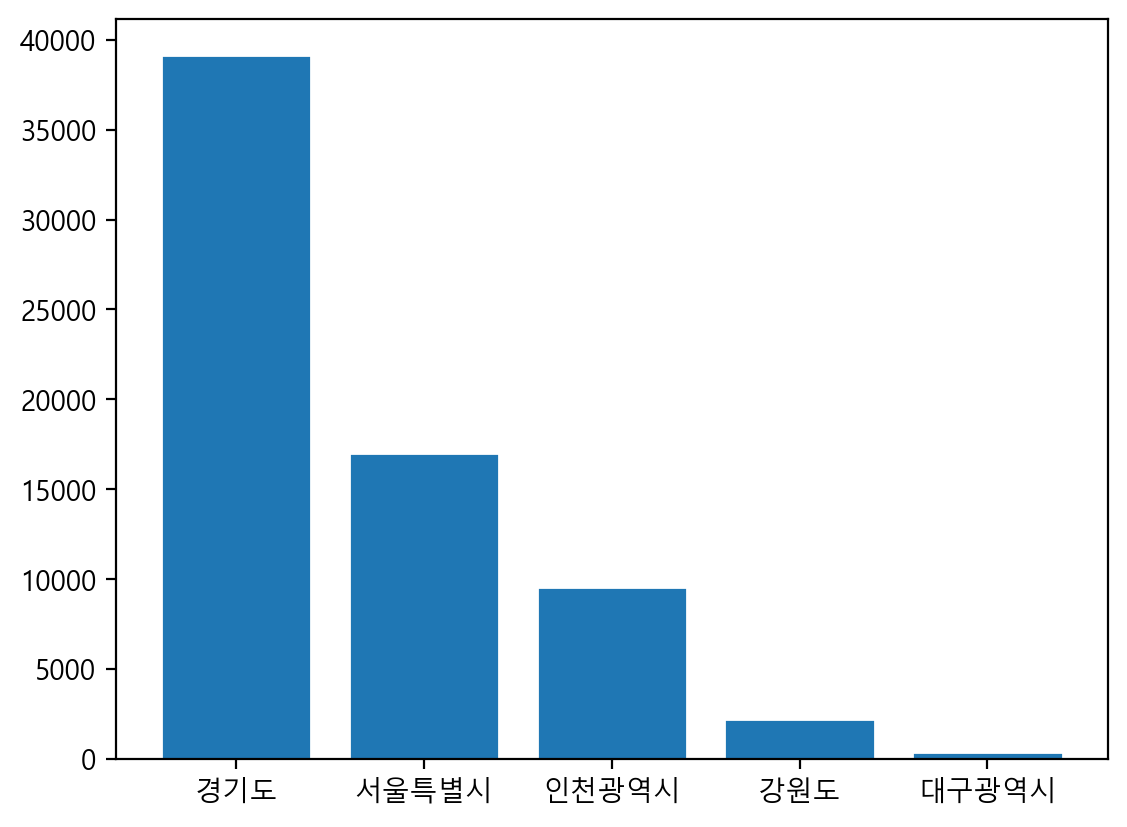

In [28]:
# 지역별 고객 수 TOP 5 시각화 
plt.bar(x=tmp_5['지역'], height=tmp_5['고객수'], edgecolor='w')
plt.show()


**2) 연령대별 고객 수**

- 연령대(Age2)별 고객 수를 집계하여 tmp 데이터프레임으로 선언합니다.
- tmp 데이터프레임 열 이름을 '연령대', '고객수'로 변경합니다.
- tmp 데이터프레임 연령대 열의 데이터 형식을 문자열로 변환합니다.

In [35]:
# 연령대별 고객 수
tmp = cst.groupby('Age2', as_index=False)[['CustomerID']].count()
tmp = tmp.rename({'Age2':'연령대', 'CustomerID':'고객수'}, axis=1)
tmp['연령대'] = tmp['연령대'].astype('str')
tmp.head()


,연령대,고객수
0,10,1
1,20,498
2,30,15793
3,40,36280
4,50,11331


- tmp 데이터프레임을 막대 그래프로 시각화 합니다.

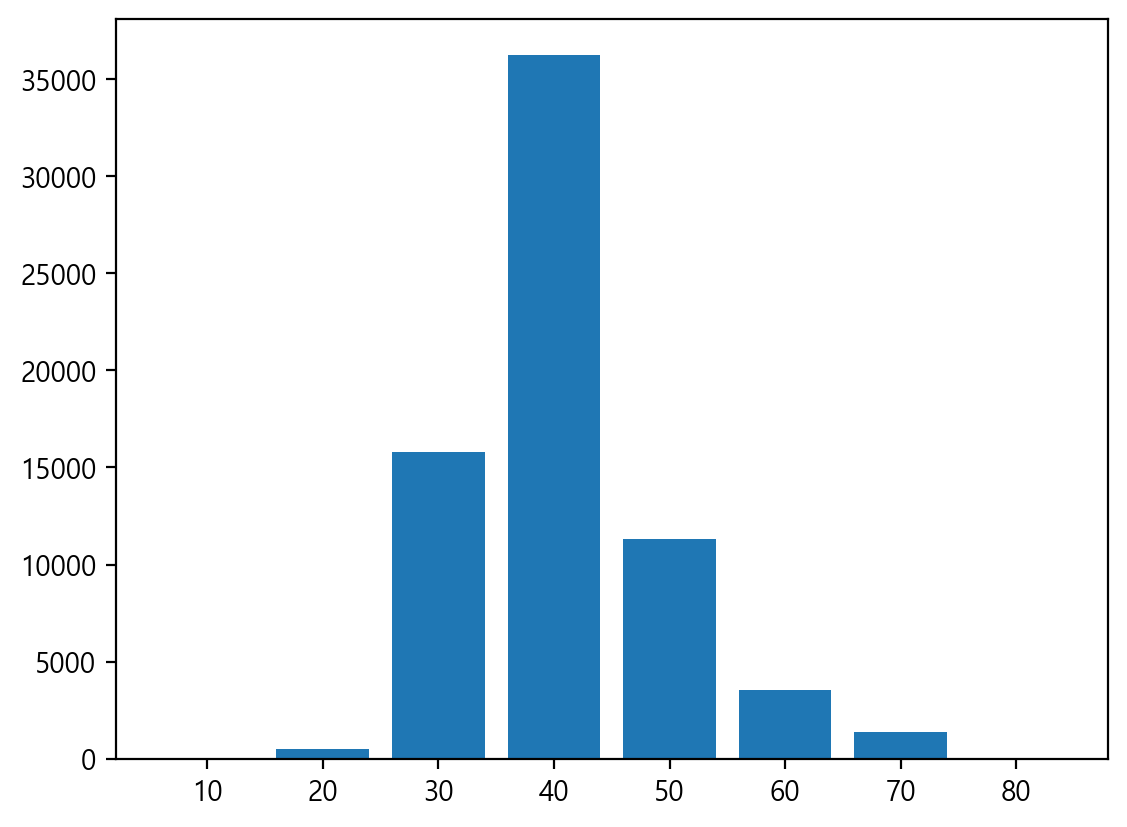

In [36]:
# 연령대별 고객 수 시각화 
plt.bar(x=tmp['연령대'], height=tmp['고객수'])
plt.show()


**3) 등급별 판매 금액**

- 등급(Level)별 판매 금액(Amt)을 집계하여 tmp 데이터프레임으로 선언합니다.
- tmp 데이터프레임 열 이름을 '등급', '합계금액'으로 변경합니다.
- 합게금액은 10,000 단위로 변경합니다.

In [42]:
# 등급별 판매 금액
tmp = cst.groupby('Level', as_index=False)[['Amt']].sum()
tmp = tmp.rename({'Level':'등급', 'Amt':'합계금액'}, axis=1)
tmp['합계금액'] = tmp['합계금액'] // 10000
tmp.head()

,등급,합계금액
0,Family,19475.0
1,Bronze,111.0
2,Silver,10.0
3,Gold,0.0
4,Platinum,0.0


- tmp 데이터프레임을 막대 그래프로 시각화 합니다.

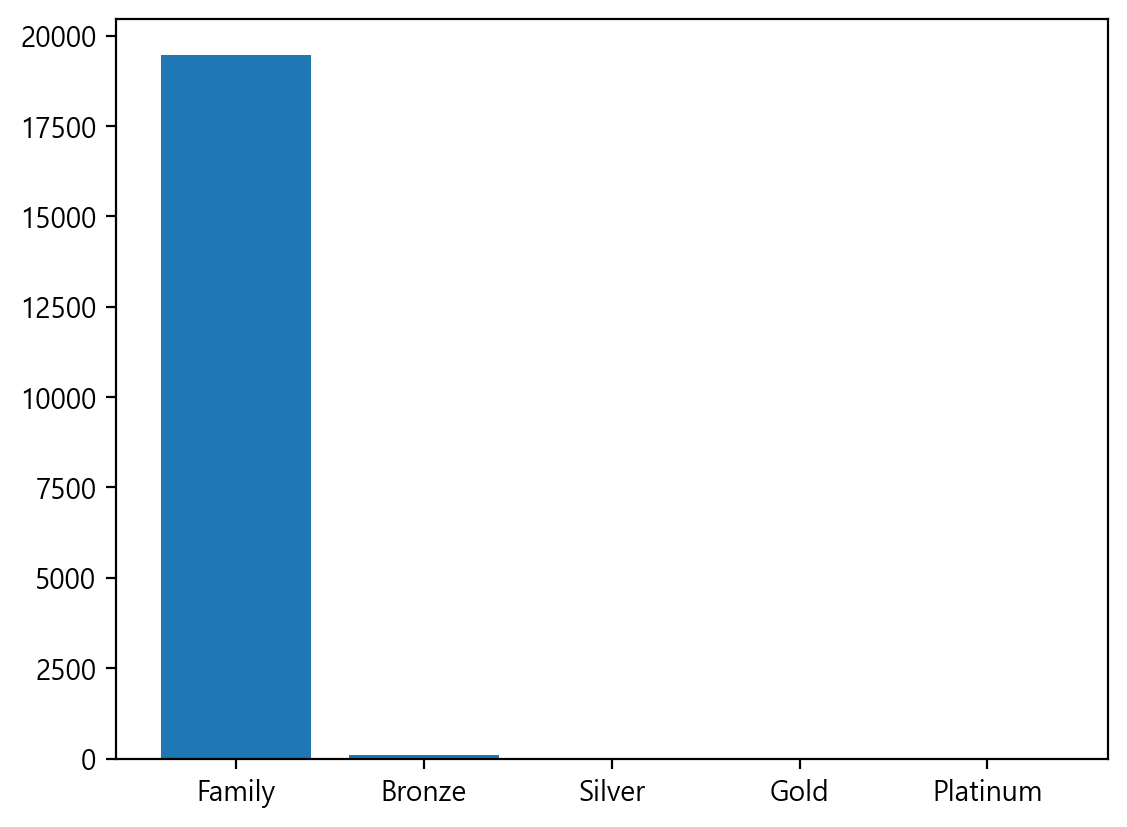

In [43]:
# 등급별 판매 금액 시각화 
plt.bar(x=tmp['등급'], height=tmp['합계금액'].astype('int'))
plt.show()


# 4.전처리 #2

**1) 열 제거**

- Addr1, RegisterYear, RegisterMonth, Age 열을 제거합니다.

In [44]:
# 열 제거
cst = cst.drop(['Addr1', 'RegisterYear', 'RegisterMonth', 'Age'], axis=1)
cst.head()


,CustomerID,Gender,Qty,Amt,Age2,Level
0,c017487,F,1.0,2900.0,40,Family
1,c017487,F,1.0,1000.0,40,Family
2,c017487,F,1.0,1227.0,40,Family
3,c017487,F,1.0,1000.0,40,Family
4,c017487,F,1.0,1455.0,40,Family


**2) 열 이름 변경**

- Age2 열 이름을 Age로 변경합니다.

In [45]:
# 열 이름 변경: Age2 --> Age
cst = cst.rename({'Age2':'Age'}, axis = 1)
cst.head()


,CustomerID,Gender,Qty,Amt,Age,Level
0,c017487,F,1.0,2900.0,40,Family
1,c017487,F,1.0,1000.0,40,Family
2,c017487,F,1.0,1227.0,40,Family
3,c017487,F,1.0,1000.0,40,Family
4,c017487,F,1.0,1455.0,40,Family


**3) 가변수화**

- Gender, Age, Level 열을 가변수화 합니다.

In [46]:
# 가변수화
table = ['Gender', 'Age', 'Level']

cst2 = pd.get_dummies(cst, columns = table, drop_first = True)

cst2.head()

,CustomerID,Qty,Amt,Gender_M,Age_20,Age_30,Age_40,Age_50,Age_60,Age_70,Age_80,Level_Bronze,Level_Silver,Level_Gold,Level_Platinum
0,c017487,1.0,2900.0,0,0,0,1,0,0,0,0,0,0,0,0
1,c017487,1.0,1000.0,0,0,0,1,0,0,0,0,0,0,0,0
2,c017487,1.0,1227.0,0,0,0,1,0,0,0,0,0,0,0,0
3,c017487,1.0,1000.0,0,0,0,1,0,0,0,0,0,0,0,0
4,c017487,1.0,1455.0,0,0,0,1,0,0,0,0,0,0,0,0
